# Exploratory Data Analysis


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from astropy.table.column import FORMATTER
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from src.preprocessing import *

## Loading data

In [3]:
df = pd.read_csv('../data/processed/num_imputed_df.csv')
y = pd.read_csv('../data/raw/application_train.csv')['TARGET']
# hay que ajustar la y porque tiene mas filas que df

desc = forma(df)
desc

'307507 filas y 87 columnas'

In [3]:
df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,6.0,7.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,1.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,6.0,7.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,6.0,7.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,6.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Principal Component Analysis (PCA)

### Creation of training and test sets

In [4]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

### Standardizing data

In [5]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### PCA

In [6]:
pca = PCA(0.95)
pca.fit(x_train_scaled)
pca.n_components_

np.int64(70)

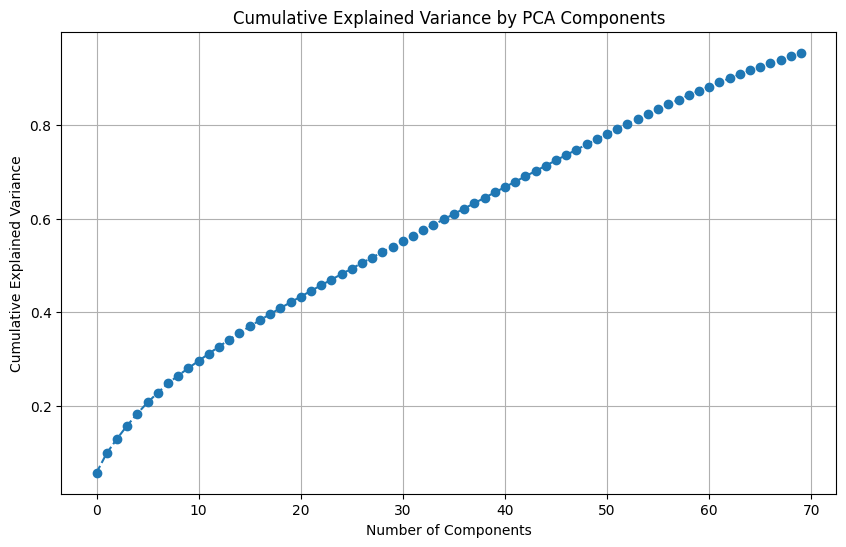

In [7]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [8]:
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Create df for PCA components
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
x_train_pca_df = pd.DataFrame(x_train_pca, columns=pca_columns)
x_test_pca_df = pd.DataFrame(x_test_pca, columns=pca_columns)

print(x_train_pca_df.head())
print(x_test_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.393879 -0.800066 -0.038506  1.155329 -0.722676  0.075906 -1.189398   
1 -0.173427  1.826099  1.034000  0.293528 -0.755822  1.097151 -1.752485   
2  1.785422 -0.839829  0.686531 -0.398778 -1.424537 -1.702615  2.390922   
3  1.231313  1.828627  0.238730  0.765041 -0.527766 -1.744928 -2.471116   
4  3.799825  8.305147  0.260432 -0.337084 -0.575622  0.728044 -4.103387   

        PC8       PC9      PC10  ...      PC61      PC62      PC63      PC64  \
0  1.069151  1.247516  0.134900  ...  1.070045 -1.136908  0.055429 -1.489631   
1  0.043467  1.042990  0.755397  ...  0.721220  0.829733 -1.017672 -1.036305   
2  0.477675 -0.067476  0.535283  ... -0.006113  1.873261 -0.177621  0.269428   
3  0.181741  0.317593 -0.062718  ...  1.372874 -0.065748  0.456852  0.646036   
4  0.778734 -2.579151 -1.560990  ... -0.857452 -0.466273 -2.070308  1.082178   

       PC65      PC66      PC67      PC68      PC69      PC70  
0  0